# Objective 1.1: Characterize distributions of lifestyle behaviors and socioeconomic indicators.
- To describe how lifestyle (physical activity, sleep, diet) and socioeconomic factors (income, education, insurance) are distributed in the population. 

## Step 1: Import and Set Up

#### Prepares the environment by importing key libraries, adjusting paths, and setting up project-specific configurations.

In [1]:
# Setup environment and imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys
import squarify
from statsmodels.stats.weightstats import DescrStatsW
import re
from IPython.display import display 

# Add the 'scripts' folder to the Python path
scripts_path = Path("../scripts").resolve()
if str(scripts_path) not in sys.path:
    sys.path.append(str(scripts_path))

from utils import pretty_path
from config import (
    FINAL_DATA_DIR,   
    PLOTS_DIR,
    SUMMARY_DIR

)

# Set pandas float display format for the entire session
pd.options.display.float_format = '{:,.2f}'.format

# Display full columns in pandas
pd.set_option('display.max_columns', None)

print("Setup complete.")

Setup complete.


## Step 2: Load the lifestyle and socio-economic csv file for analysing the Objective 1.1

In [2]:
# Read the csv file into the dataframe

file_path = FINAL_DATA_DIR / "final_merged_lifestyle_socio_economic.csv"
if not file_path.exists():
    raise FileNotFoundError(f"File not found:{pretty_path(file_path)}")
df = pd.read_csv(file_path)

# preview the first few rows of a DataFrame.
df.head()

,participant_id,age,gender,race_ethnicity,education_level,poverty_income_ratio,pir_category,interview_sample_weight,has_health_insurance,sleep_avg_hr,sleep_category,activity_level,total_weekly_min,diet_score,diet_category,diet_weight
0,130378,43,Male,Non-Hispanic Asian,College graduate or above,5.00,Very High,"50,055.45",Yes,9.36,Long Sleep,Low active,135.00,1.00,Unhealthy,"70,554.22"
1,130379,66,Male,Non-Hispanic White,College graduate or above,5.00,Very High,"29,087.45",Yes,9.00,Normal Sleep,Moderately active,180.00,3.00,Healthy,"36,505.47"
2,130380,44,Female,Other Hispanic,High school/GED,1.41,Mid,"80,062.67",Yes,8.29,Normal Sleep,Low active,20.00,1.00,Unhealthy,"103,979.19"
3,130386,34,Male,Mexican American,Some college/AA degree,1.33,Mid,"30,995.28",Yes,7.64,Normal Sleep,Low active,30.00,3.00,Healthy,"73,251.22"
4,130387,68,Female,Non-Hispanic White,College graduate or above,1.32,Mid,"19,896.97",Yes,3.57,Short Sleep,NaN,NaN,1.00,Unhealthy,"21,594.11"


### Step 3: Data Analysis

### Helper function for excel

#### cleans up sheet names so they work in Excel. It gets rid of any weird characters and makes sure the name isn’t too long. That way, the sheet name won’t cause errors when you open the file.

In [3]:
# === Helper to clean Excel sheet names ===
def clean_sheet_name(name):
    # Remove invalid characters and trim to 31 characters
    return re.sub(r"[:\\/*?\[\]]", "_", name)[:31]
 


### Descriptive Statistics

####  All about summarizing and reporting socioeconomic and lifestyle data from a dataset.(Unweighted) 

In [4]:
# Create a copy of the DataFrame
obj1_df = df.copy()

# Create a dictionary to store all output DataFrames
output_tables = {}

# === DEMOGRAPHICS & SOCIOECONOMIC STATUS ===

# Gender
gender_counts = obj1_df["gender"].value_counts()
gender_percent = obj1_df["gender"].value_counts(normalize=True) * 100
gender_df = pd.concat([gender_counts, gender_percent.round(2)], axis=1, keys=["Count", "Percent (%)"])
output_tables["Gender Distribution"] = gender_df

# Race/Ethnicity
race_counts = obj1_df["race_ethnicity"].value_counts()
race_percent = obj1_df["race_ethnicity"].value_counts(normalize=True) * 100
race_df = pd.concat([race_counts, race_percent.round(2)], axis=1, keys=["Count", "Percent (%)"])
output_tables["Race/Ethnicity Distribution"] = race_df

# Education Level
edu_counts = obj1_df["education_level"].value_counts()
edu_percent = obj1_df["education_level"].value_counts(normalize=True) * 100
edu_df = pd.concat([edu_counts, edu_percent.round(2)], axis=1, keys=["Count", "Percent (%)"])
output_tables["Education Level"] = edu_df

# Poverty Income Ratio Summary
pir_summary = obj1_df["poverty_income_ratio"].describe().round(2).to_frame(name="PIR Stats")
output_tables["PIR Summary"] = pir_summary

# Health Insurance
insurance_counts = obj1_df["has_health_insurance"].value_counts()
insurance_percent = obj1_df["has_health_insurance"].value_counts(normalize=True) * 100
insurance_df = pd.concat([insurance_counts, insurance_percent.round(2)], axis=1, keys=["Count", "Percent (%)"])
output_tables["Health Insurance Coverage"] = insurance_df

# === LIFESTYLE BEHAVIORS ===

# Sleep Duration (continuous)
sleep_summary = obj1_df["sleep_avg_hr"].describe().round(2).to_frame(name="Sleep Stats")
output_tables["Sleep Summary"] = sleep_summary

# Sleep Category
sleep_cat_counts = obj1_df["sleep_category"].value_counts()
sleep_cat_percent = obj1_df["sleep_category"].value_counts(normalize=True) * 100
sleep_cat_df = pd.concat([sleep_cat_counts, sleep_cat_percent.round(2)], axis=1, keys=["Count", "Percent (%)"])
output_tables["Sleep Category"] = sleep_cat_df

# Physical Activity (weekly minutes)
activity_summary = obj1_df["total_weekly_min"].describe().round(2).to_frame(name="Activity Stats")
output_tables["Physical Activity Summary"] = activity_summary

# Activity Level
activity_counts = obj1_df["activity_level"].value_counts()
activity_percent = obj1_df["activity_level"].value_counts(normalize=True) * 100
activity_df = pd.concat([activity_counts, activity_percent.round(2)], axis=1, keys=["Count", "Percent (%)"])
output_tables["Activity Level"] = activity_df

# Diet Score
diet_summary = obj1_df["diet_score"].describe().round(2).to_frame(name="Diet Score Stats")
output_tables["Diet Score Summary"] = diet_summary

# Diet Category
diet_cat_counts = obj1_df["diet_category"].value_counts()
diet_cat_percent = obj1_df["diet_category"].value_counts(normalize=True) * 100
diet_cat_df = pd.concat([diet_cat_counts, diet_cat_percent.round(2)], axis=1, keys=["Count", "Percent (%)"])
output_tables["Diet Quality Category"] = diet_cat_df


# Show all tables in notebook before saving to Excel
for sheet_name, table in output_tables.items():
    print(f"\n=== {sheet_name} ===")
    display(table) 

# === Save to Excel ===

output_file = SUMMARY_DIR/"obj_1.1_lifestyle_and_socio_economic_unweighted_stats_report.xlsx"

with pd.ExcelWriter(output_file, engine="xlsxwriter") as writer:
    for sheet_name, table in output_tables.items():
        clean_name = clean_sheet_name(sheet_name)
        table.to_excel(writer, sheet_name=clean_name)

print(f"Lifestyle and socio-economic statics report saved to '{pretty_path(output_file)}'")



=== Gender Distribution ===


,Count,Percent (%)
gender,,
Female,3344,55.15
Male,2720,44.85



=== Race/Ethnicity Distribution ===


,Count,Percent (%)
race_ethnicity,,
Non-Hispanic White,3569,58.86
Non-Hispanic Black,753,12.42
Other Hispanic,614,10.13
Mexican American,405,6.68
Other/Multi-Racial,388,6.40
Non-Hispanic Asian,335,5.52



=== Education Level ===


,Count,Percent (%)
education_level,,
College graduate or above,2143,35.34
Some college/AA degree,1846,30.44
High school/GED,1297,21.39
9-11th grade,482,7.95
<9th grade,292,4.82
Missing,4,0.07



=== PIR Summary ===


,PIR Stats
count,"6,064.00"
mean,2.91
std,1.61
min,0.01
25%,1.47
50%,2.78
75%,4.92
max,5.00



=== Health Insurance Coverage ===


,Count,Percent (%)
has_health_insurance,,
Yes,5557,91.78
No,498,8.22



=== Sleep Summary ===


,Sleep Stats
count,"5,987.00"
mean,7.82
std,1.46
min,1.00
25%,7.00
50%,8.00
75%,8.64
max,13.07



=== Sleep Category ===


,Count,Percent (%)
sleep_category,,
Normal Sleep,4626,77.27
Long Sleep,854,14.26
Short Sleep,507,8.47



=== Physical Activity Summary ===


,Activity Stats
count,"4,449.00"
mean,212.40
std,239.20
min,0.19
25%,60.00
50%,140.00
75%,270.00
max,"3,360.00"



=== Activity Level ===


,Count,Percent (%)
activity_level,,
Low active,2249,50.55
Moderately active,1135,25.51
Highly active,1065,23.94



=== Diet Score Summary ===


,Diet Score Stats
count,"4,285.00"
mean,1.24
std,0.88
min,0.00
25%,1.00
50%,1.00
75%,2.00
max,4.00



=== Diet Quality Category ===


,Count,Percent (%)
diet_category,,
Unhealthy,2608,60.86
Moderate,1394,32.53
Healthy,283,6.60


Lifestyle and socio-economic statics report saved to 'outputs\summary\obj_1.1_lifestyle_and_socio_economic_unweighted_stats_report.xlsx'


### Distribution Visualization (Unweighted)

#### To help understand how people live, eat, sleep, and take care of their health.

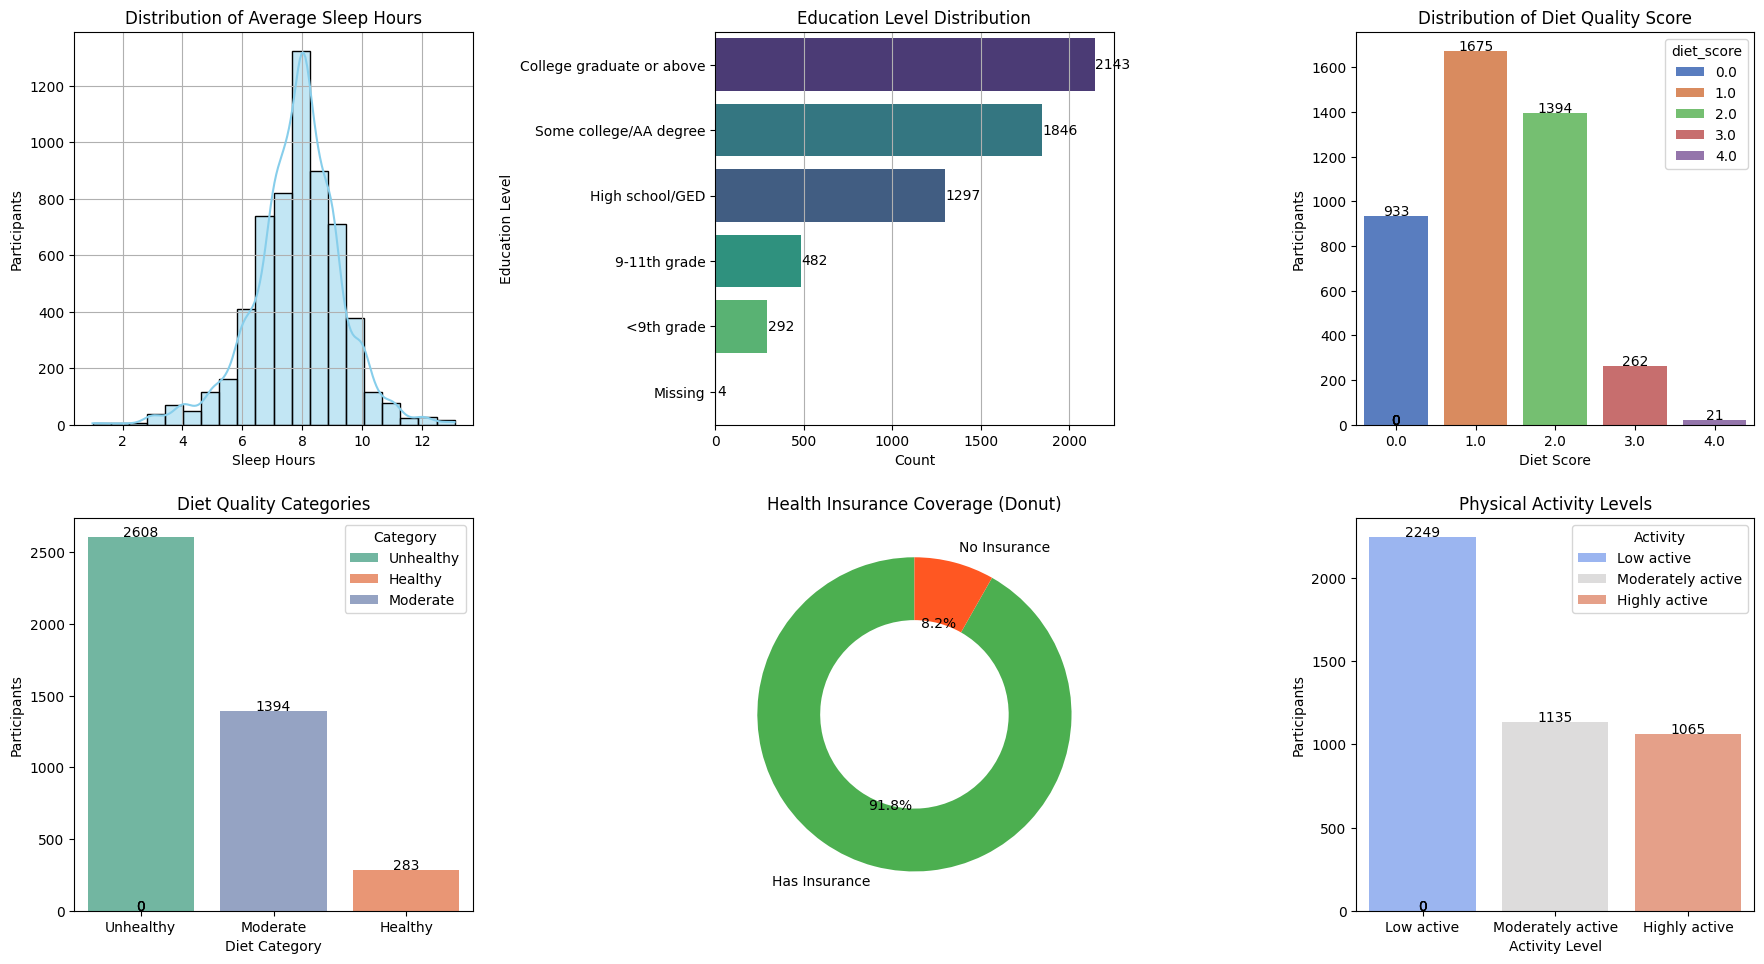

Plots saved to outputs\plots\obj_1.1_lifestyle_and_socio_economic_unweighted_stats_plots.png


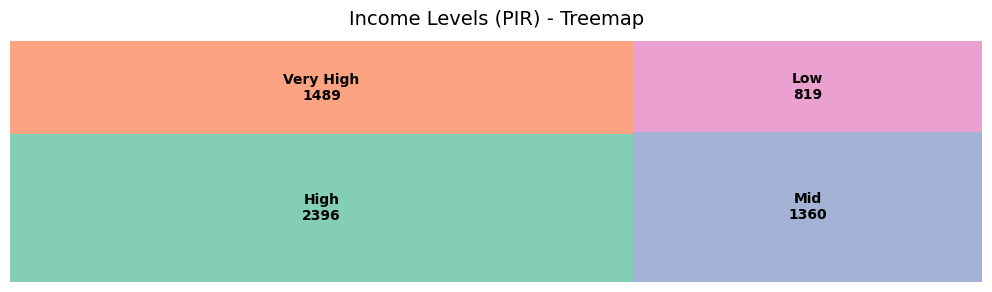

Plots saved to outputs\plots\obj_1.1_income_treemap_unweighted.png


Plots saved to outputs\plots\obj_1.1_sunburst_insurance_by_gender_unweighted.html


In [5]:
# ========== Grid of 6 Lifestyle/Socio-Economic Plots ==========
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# 1. Sleep Histogram
sns.histplot(obj1_df["sleep_avg_hr"], kde=True, bins=20, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title("Distribution of Average Sleep Hours")
axs[0, 0].set_xlabel("Sleep Hours")
axs[0, 0].set_ylabel("Participants")
axs[0, 0].grid(True)

# 2. Education Level (Horizontal Bar)
sns.countplot(data=obj1_df, y="education_level", hue="education_level",
              order=obj1_df["education_level"].value_counts().index,
              palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title("Education Level Distribution")
axs[0, 1].set_xlabel("Count")
axs[0, 1].set_ylabel("Education Level")
axs[0, 1].grid(True, axis='x')
# Add count labels on horizontal bars
for p in axs[0, 1].patches:
    width = p.get_width()
    axs[0, 1].text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')

# 3. Diet Score (Vertical Bars)
sns.countplot(data=obj1_df, x='diet_score', hue='diet_score', palette='muted', ax=axs[0, 2])
axs[0, 2].set_title('Distribution of Diet Quality Score')
axs[0, 2].set_xlabel('Diet Score')
axs[0, 2].set_ylabel('Participants')
# Add count labels on vertical bars
for p in axs[0, 2].patches:
    height = p.get_height()
    axs[0, 2].text(p.get_x() + p.get_width()/2, height + 2, int(height), ha='center')

# 4. Diet Category (Vertical Bars)
sns.countplot(data=obj1_df, x='diet_category',
              hue='diet_category',
              order=['Unhealthy', 'Moderate', 'Healthy'],
              palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title('Diet Quality Categories')
axs[1, 0].set_xlabel('Diet Category')
axs[1, 0].set_ylabel('Participants')
axs[1, 0].legend(title='Category')
# Add count labels on vertical bars
for p in axs[1, 0].patches:
    height = p.get_height()
    axs[1, 0].text(p.get_x() + p.get_width()/2, height + 2, int(height), ha='center')

# 5. Health Insurance Donut
insurance_counts = obj1_df['has_health_insurance'].value_counts()
colors = ['#4CAF50', '#FF5722']
axs[1, 1].pie(insurance_counts, labels=['Has Insurance', 'No Insurance'],
             autopct='%1.1f%%', startangle=90, colors=colors,
             wedgeprops={'width': 0.4})
axs[1, 1].set_title('Health Insurance Coverage (Donut)')

# 6. Physical Activity (Vertical Bars)
sns.countplot(data=obj1_df, x='activity_level',
              hue='activity_level',
              order=obj1_df['activity_level'].value_counts().index,
              palette='coolwarm', ax=axs[1, 2])
axs[1, 2].set_title('Physical Activity Levels')
axs[1, 2].set_xlabel('Activity Level')
axs[1, 2].set_ylabel('Participants')
axs[1, 2].legend(title='Activity')
# Add count labels on vertical bars
for p in axs[1, 2].patches:
    height = p.get_height()
    axs[1, 2].text(p.get_x() + p.get_width()/2, height + 2, int(height), ha='center')

# Save 6 plots in one png file
plt.tight_layout(pad=2.0)
six_plot_path = PLOTS_DIR / "obj_1.1_lifestyle_and_socio_economic_unweighted_stats_plots.png"
plt.savefig(six_plot_path, dpi=300)
plt.show()
plt.close()
print(f"Plots saved to {pretty_path(six_plot_path)}")

# ========== Treemap: Income Level ==========
income_counts = obj1_df['pir_category'].value_counts()
labels = [f'{cat}\n{count}' for cat, count in zip(income_counts.index, income_counts.values)]

plt.figure(figsize=(10, 3))
squarify.plot(
    sizes=income_counts.values,
    label=labels,
    alpha=0.8,
    color=sns.color_palette('Set2'),
    text_kwargs={'fontsize': 10, 'weight': 'bold', 'color': 'black'}
)
plt.axis('off')
plt.title('Income Levels (PIR) - Treemap', fontsize=14, pad=12)
plt.tight_layout(pad=1)

treemap_path = PLOTS_DIR / "obj_1.1_income_treemap_unweighted.png"
plt.savefig(treemap_path, dpi=300)
plt.show()
plt.close()
print(f"Plots saved to {pretty_path(treemap_path)}")

# ========== Sunburst: Gender vs Health Insurance ==========
sunburst_df = obj1_df.dropna(subset=['gender', 'has_health_insurance'])
fig = px.sunburst(
    sunburst_df,
    path=['gender', 'has_health_insurance'],
    color='has_health_insurance',
    color_discrete_map={'Yes': '#4CAF50', 'No': '#FF5722'},
    title='Health Insurance Coverage by Gender'
)

fig.update_layout(
    margin=dict(t=50, l=10, r=10, b=10),
    title_font_size=18,
    uniformtext=dict(minsize=12, mode='hide'),
    width=960,
    height=288
)

sunburst_path = PLOTS_DIR / "obj_1.1_sunburst_insurance_by_gender_unweighted.html"
fig.write_html(sunburst_path)
fig.show()

print(f"Plots saved to {pretty_path(sunburst_path)}")


### Apply sample weights to analyze or summarize the data

#### Used a special method called “weighted statistics” to make sure everyone's answers are fairly represented—especially when some groups are over- or under-represented in the data. 

In [6]:
# Weighted mean and std for continuous variables using DescrStatsW
def weighted_mean_std(data, value_col, weight_col):
    df = data[[value_col, weight_col]].dropna()
    dsw = DescrStatsW(df[value_col], weights=df[weight_col], ddof=0)
    return round(dsw.mean, 2), round(dsw.std, 2)

# Weighted proportions for categorical variables using DescrStatsW
def weighted_proportions(data, cat_col, weight_col):
    df = data[[cat_col, weight_col]].dropna()
    categories = df[cat_col].unique()
    
    results = []
    for cat in categories:
        mask = df[cat_col] == cat
        dsw = DescrStatsW(mask.astype(int), weights=df[weight_col], ddof=0)
        weighted_percent = round(dsw.mean * 100, 2)
        weighted_count = round(dsw.sum, 2)
        results.append((cat, weighted_count, weighted_percent))
    
    return pd.DataFrame(results, columns=[cat_col, 'Weighted Count', 'Weighted Percent (%)'])

# Create output tables dictionary using original descriptive sheet names
output_tables = {}

# Example assuming obj1_df is your DataFrame
output_tables["Gender Distribution"] = weighted_proportions(obj1_df, 'gender', 'interview_sample_weight')
output_tables["Race/Ethnicity Distribution"] = weighted_proportions(obj1_df, 'race_ethnicity', 'interview_sample_weight')
output_tables["Education Level Distribution"] = weighted_proportions(obj1_df, 'education_level', 'interview_sample_weight')

mean_pir, std_pir = weighted_mean_std(obj1_df, 'poverty_income_ratio', 'interview_sample_weight')
output_tables["PIR Summary"] = pd.DataFrame({
    'Metric': ['Weighted Mean', 'Weighted Std Dev'],
    'Poverty Income Ratio (PIR)': [mean_pir, std_pir]
})

output_tables["Health Insurance Coverage"] = weighted_proportions(obj1_df, 'has_health_insurance', 'interview_sample_weight')

mean_sleep, std_sleep = weighted_mean_std(obj1_df, 'sleep_avg_hr', 'interview_sample_weight')
output_tables["Sleep Duration Summary"] = pd.DataFrame({
    'Metric': ['Weighted Mean', 'Weighted Std Dev'],
    'Sleep (Avg Hrs/Day)': [mean_sleep, std_sleep]
})

output_tables["Sleep Duration Category"] = weighted_proportions(obj1_df, 'sleep_category', 'interview_sample_weight')

mean_pa, std_pa = weighted_mean_std(obj1_df, 'total_weekly_min', 'interview_sample_weight')
output_tables["Physical Activity Summary"] = pd.DataFrame({
    'Metric': ['Weighted Mean', 'Weighted Std Dev'],
    'Weekly Activity (min)': [mean_pa, std_pa]
})

output_tables["Physical Activity Level"] = weighted_proportions(obj1_df, 'activity_level', 'interview_sample_weight')

mean_diet, std_diet = weighted_mean_std(obj1_df, 'diet_score', 'diet_weight')
output_tables["Diet Score Summary"] = pd.DataFrame({
    'Metric': ['Weighted Mean', 'Weighted Std Dev'],
    'Diet Score': [mean_diet, std_diet]
})

output_tables["Diet Quality Category"] = weighted_proportions(obj1_df, 'diet_category', 'diet_weight')

# Show all tables before saving to Excel
for sheet_name, table in output_tables.items():
    print(f"\n=== {sheet_name} ===")
    display(table)  

# Write to Excel
output_file = SUMMARY_DIR / "obj_1.1_lifestyle_and_socio_economic_weighted_stats_report.xlsx"

with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    for sheet_name, table in output_tables.items():
        clean_name = clean_sheet_name(sheet_name)
        table.to_excel(writer, sheet_name=clean_name, index=False)

print(f"Lifestyle and socioeconomic weighted stats report saved to: {pretty_path(output_file)}")



=== Gender Distribution ===


,gender,Weighted Count,Weighted Percent (%)
0,Male,"91,695,703.58",48.56
1,Female,"97,143,692.86",51.44



=== Race/Ethnicity Distribution ===


,race_ethnicity,Weighted Count,Weighted Percent (%)
0,Non-Hispanic Asian,"11,738,908.33",6.22
1,Non-Hispanic White,"114,563,697.54",60.67
2,Other Hispanic,"17,995,522.59",9.53
3,Mexican American,"13,313,140.37",7.05
4,Non-Hispanic Black,"19,912,135.01",10.54
5,Other/Multi-Racial,"11,315,992.60",5.99



=== Education Level Distribution ===


,education_level,Weighted Count,Weighted Percent (%)
0,College graduate or above,"67,663,329.29",35.83
1,High school/GED,"47,080,639.30",24.93
2,Some college/AA degree,"56,144,844.75",29.73
3,9-11th grade,"11,208,236.52",5.94
4,<9th grade,"6,668,494.53",3.53
5,Missing,"73,852.05",0.04



=== PIR Summary ===


,Metric,Poverty Income Ratio (PIR)
0,Weighted Mean,3.06
1,Weighted Std Dev,1.58



=== Health Insurance Coverage ===


,has_health_insurance,Weighted Count,Weighted Percent (%)
0,Yes,"171,828,475.46",91.15
1,No,"16,687,173.70",8.85



=== Sleep Duration Summary ===


,Metric,Sleep (Avg Hrs/Day)
0,Weighted Mean,7.82
1,Weighted Std Dev,1.38



=== Sleep Duration Category ===


,sleep_category,Weighted Count,Weighted Percent (%)
0,Long Sleep,"24,623,661.01",13.18
1,Normal Sleep,"147,848,282.92",79.13
2,Short Sleep,"14,359,826.51",7.69



=== Physical Activity Summary ===


,Metric,Weekly Activity (min)
0,Weighted Mean,205.40
1,Weighted Std Dev,228.97



=== Physical Activity Level ===


,activity_level,Weighted Count,Weighted Percent (%)
0,Low active,"74,431,905.43",52.10
1,Moderately active,"35,348,370.16",24.74
2,Highly active,"33,086,985.83",23.16



=== Diet Score Summary ===


,Metric,Diet Score
0,Weighted Mean,1.20
1,Weighted Std Dev,0.87



=== Diet Quality Category ===


,diet_category,Weighted Count,Weighted Percent (%)
0,Unhealthy,"154,259,092.34",62.95
1,Healthy,"14,374,759.63",5.87
2,Moderate,"76,427,316.88",31.19


Lifestyle and socioeconomic weighted stats report saved to: outputs\summary\obj_1.1_lifestyle_and_socio_economic_weighted_stats_report.xlsx


### Apply sample weights to analyze or visualize the data

#### I am looking at data from NHANES (2021–2023) and creating a set of clean, easy-to-read visual summaries. Each chart shows how different lifestyle and socioeconomic factors are distributed across the population, weighted to reflect the national U.S. population accurately.

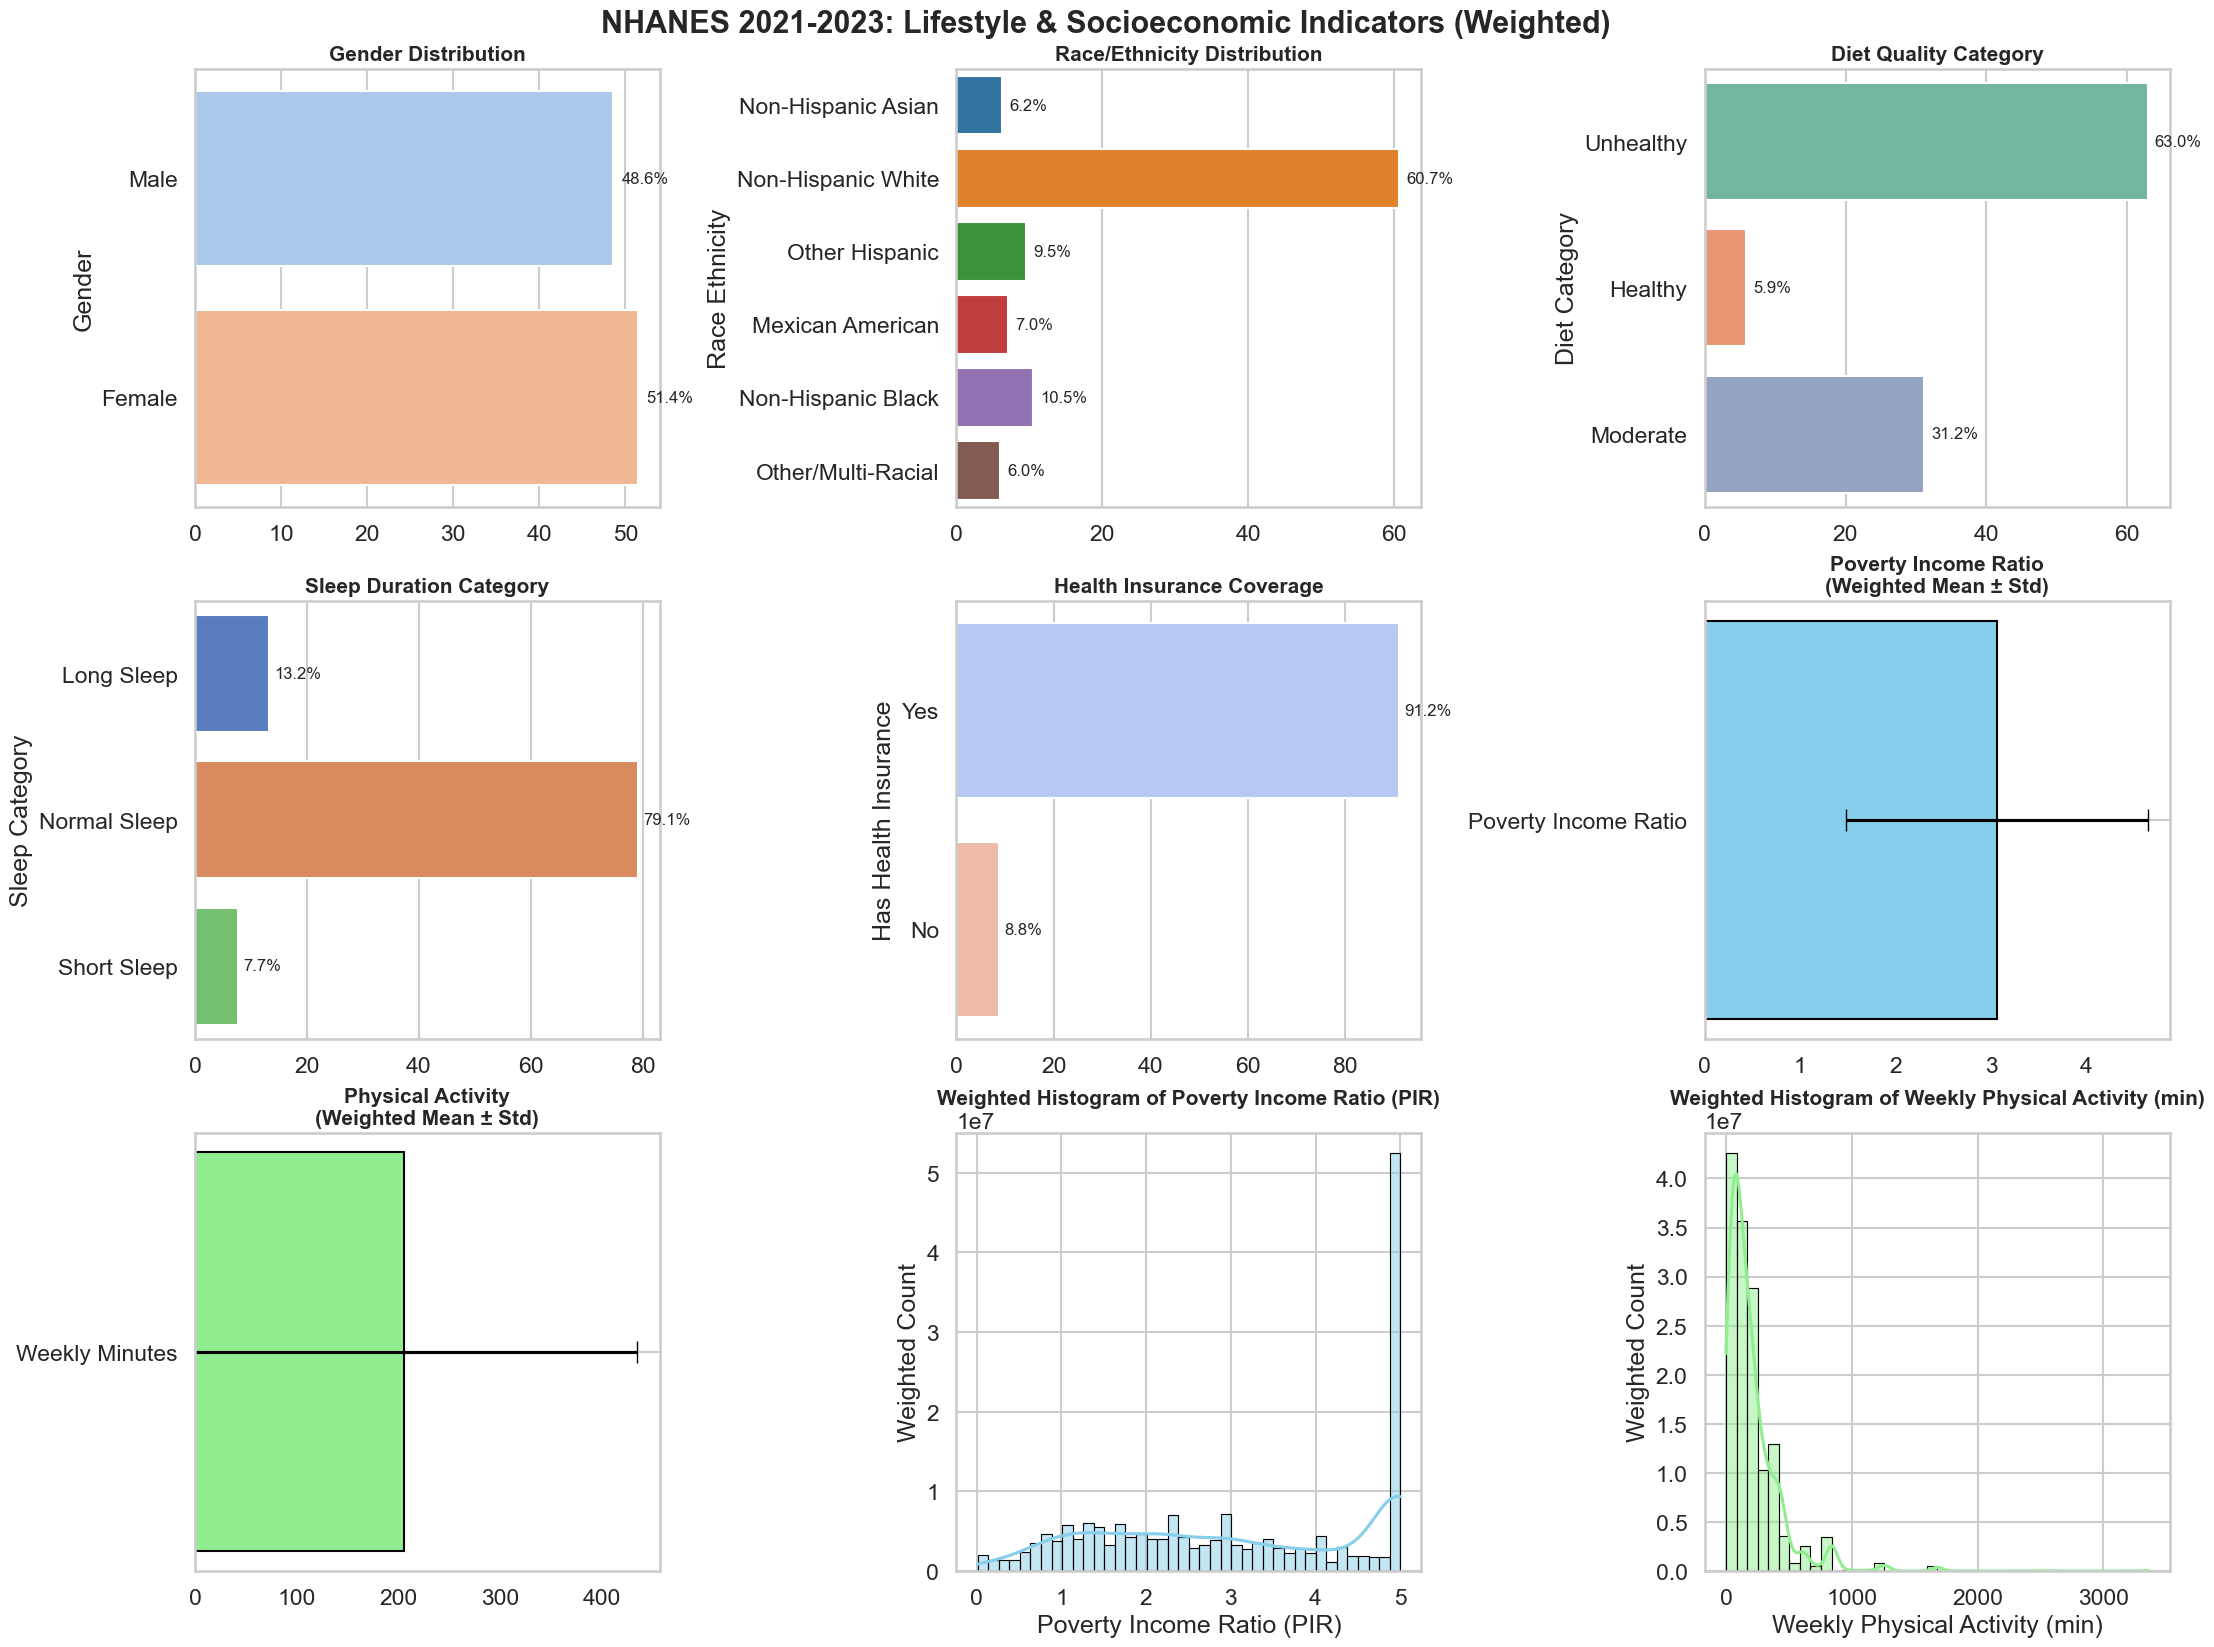

Lifestyle and socioeconomic weighted stats distribution plots saved to: outputs\plots\obj_1.1_lifestyle_and_socio_economic_weighted_stats_distribution_plots.png


In [7]:
# Get weighted summaries as DataFrames
gender_df = weighted_proportions(obj1_df, 'gender', 'interview_sample_weight')
race_df = weighted_proportions(obj1_df, 'race_ethnicity', 'interview_sample_weight')
diet_cat_df = weighted_proportions(obj1_df, 'diet_category', 'diet_weight')
sleep_cat_df = weighted_proportions(obj1_df, 'sleep_category', 'interview_sample_weight')
insurance_df = weighted_proportions(obj1_df, 'has_health_insurance', 'interview_sample_weight')

# Reset indices
gender_df = gender_df.reset_index(drop=True)
race_df = race_df.reset_index(drop=True)
diet_cat_df = diet_cat_df.reset_index(drop=True)
sleep_cat_df = sleep_cat_df.reset_index(drop=True)
insurance_df = insurance_df.reset_index(drop=True)

# Weighted means ± std
mean_pir, std_pir = weighted_mean_std(obj1_df, 'poverty_income_ratio', 'interview_sample_weight')
mean_pa, std_pa = weighted_mean_std(obj1_df, 'total_weekly_min', 'interview_sample_weight')

# Plot style
sns.set_style("whitegrid")
sns.set_context("talk")

# Create 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(22, 16), constrained_layout=True)
axes = axes.flatten()

# Plot 1–5: Proportions
barplot_data = [
    (gender_df, 'gender', 'Gender Distribution', 'pastel'),
    (race_df, 'race_ethnicity', 'Race/Ethnicity Distribution', 'tab10'),
    (diet_cat_df, 'diet_category', 'Diet Quality Category', 'Set2'),
    (sleep_cat_df, 'sleep_category', 'Sleep Duration Category', 'muted'),
    (insurance_df, 'has_health_insurance', 'Health Insurance Coverage', 'coolwarm')
]

for idx, (df, col, title, palette) in enumerate(barplot_data):
    sns.barplot(x='Weighted Percent (%)', y=col, hue=col, data=df,
                ax=axes[idx], palette=palette, legend=False)
    axes[idx].set_title(title, fontsize=15, weight='bold')
    for i, val in enumerate(df['Weighted Percent (%)']):
        axes[idx].text(val + 1, i, f'{val:.1f}%', va='center', fontsize=12)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(col.replace('_', ' ').title())

# Plot 6: PIR Bar with Error
axes[5].barh(['Poverty Income Ratio'], [mean_pir],
             xerr=[std_pir], color='skyblue', edgecolor='black', capsize=8)
axes[5].set_xlim(left=0)
axes[5].set_title('Poverty Income Ratio\n(Weighted Mean ± Std)', fontsize=15, weight='bold')
axes[5].set_xlabel('')
axes[5].set_ylabel('')
axes[5].grid(axis='x')

# Plot 7: Physical Activity Bar with Error
axes[6].barh(['Weekly Minutes'], [mean_pa],
             xerr=[std_pa], color='lightgreen', edgecolor='black', capsize=8)
axes[6].set_xlim(left=0)
axes[6].set_title('Physical Activity\n(Weighted Mean ± Std)', fontsize=15, weight='bold')
axes[6].set_xlabel('')
axes[6].set_ylabel('')
axes[6].grid(axis='x')

# Plot 8: Weighted Histogram for Poverty Income Ratio
sns.histplot(
    obj1_df,
    x='poverty_income_ratio',
    weights='interview_sample_weight',
    bins=40,
    kde=True,
    color='skyblue',
    edgecolor='black',
    ax=axes[7]
)
axes[7].set_title('Weighted Histogram of Poverty Income Ratio (PIR)', fontsize=15, weight='bold')
axes[7].set_xlabel('Poverty Income Ratio (PIR)')
axes[7].set_ylabel('Weighted Count')

# Plot 9: Weighted Histogram for Physical Activity
sns.histplot(
    obj1_df,
    x='total_weekly_min',
    weights='interview_sample_weight',
    bins=40,
    kde=True,
    color='lightgreen',
    edgecolor='black',
    ax=axes[8]
)
axes[8].set_title('Weighted Histogram of Weekly Physical Activity (min)', fontsize=15, weight='bold')
axes[8].set_xlabel('Weekly Physical Activity (min)')
axes[8].set_ylabel('Weighted Count')

# Title
fig.suptitle("NHANES 2021-2023: Lifestyle & Socioeconomic Indicators (Weighted)",
             fontsize=22, weight='bold', y=1.02)

# Save & Show
PLOTS_DIR.mkdir(parents=True, exist_ok=True)
plot_path = PLOTS_DIR / "obj_1.1_lifestyle_and_socio_economic_weighted_stats_distribution_plots.png"
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()
print(f"Lifestyle and socioeconomic weighted stats distribution plots saved to: {pretty_path(plot_path)}")
